<a href="https://colab.research.google.com/github/sheensta/twitter_hate_speech/blob/master/individual_project_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transfer Learning with NLP

In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import keras

## Loading Data

In [2]:
from google.colab import files
uploaded = files.upload()

In [3]:
uploaded2 = files.upload()

In [67]:
df = pd.read_csv('df_clean.csv')
df = df.iloc[:,3:]

## Cleaning Data

In [68]:
#remove mentions, urls, hashtags, ;&, and 'rt' and other punctuation. keep a count of mentions, urls, hashtags
tweets = df['tweet_lemma']

mentions = []
urls = []
hashtags = []
i = 0
for tweet in tweets:
    tweet = tweet.split()
    mentions.append(tweet.count('mentionhere')+tweet.count('mentionhere:')+tweet.count('"mentionhere:')+tweet.count('&#;mentionhere:'))
    urls.append(tweet.count('urlhere'))
    hashtags.append(tweet.count('hashtaghere'))
    tweet = [token for token in tweet if token not in [';&','']]
    tweet = [token for token in tweet if token not in ['&#;mentionhere:','mentionhere:','"mentionhere:','mentionhere', 'urlhere', 'hashtaghere', 'rt', 'amp']]
    tweet = " ".join(tweet)
    tweets[i] = tweet
    i += 1
    
df['tweet_no_others'] = tweets
df['mention_count'] = mentions
df['url_count'] = urls
df['hashtag_count'] = hashtags

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,count,hate_speech,offensive_language,neither,class,tweet,tweet_clean,tweet_lemma,tweet_nouns,tweet_sym,tweet_verbs,tweet_nv,num_tokens,tweet_no_others,mention_count,url_count,hashtag_count
0,3,1,2,0,1,""" bitch who do you love """,bitch who do you love,bitch who do -PRON- love,bitch,NaN,love,bitch love,5.0,bitch who do -PRON- love,0,0,0
1,3,0,3,0,1,""" fuck no that bitch dont even suck dick "" &#1...",fuck no that bitch dont even suck dick ...,fuck no that bitch do not even suck dick the k...,bitch dick kermit video bout,NaN,suck fuck,bitch dick kermit video bout suck fuck,18.0,fuck no that bitch do not even suck dick the k...,0,0,0
2,3,0,2,1,1,""" lames crying over hoes thats tears of a clown """,lames crying over hoes thats tears of a clown,lame cry over hoe that s tear of a clown,lame hoe tear clown,NaN,cry s,lame hoe tear clown cry s,10.0,lame cry over hoe that s tear of a clown,0,0,0
3,3,0,3,0,1,"""..All I wanna do is get money and fuck model ...",all i wanna do is get money and fuck model bit...,all i wanna do be get money and fuck model bit...,wanna money fuck model bitch russell simmons,NaN,NaN,wanna money fuck model bitch russell simmons,14.0,all i wanna do be get money and fuck model bit...,0,0,0
4,3,0,3,0,1,"""@ARIZZLEINDACUT: Females think dating a pussy...",mentionhere females think dating a pussy is c...,female think date a pussy be cute now how do d...,mentionhere female pussy stuff pussy,NaN,think date urlhere do make,mentionhere female pussy stuff pussy think dat...,22.0,female think date a pussy be cute now how do d...,1,1,0


In [69]:
feature_array = pd.read_csv('twitter_feature_array.csv')
feature_array = feature_array.iloc[:,1:]
feature_array.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.092240,0.655190,-0.054113,-0.001526,0.245873,-0.047122,-0.195120,-0.241070,-0.024567,-0.028244,-0.084202,0.017118,-0.144938,0.133747,0.260563,0.235359,0.074279,-0.286692,0.023163,-0.300279,-0.086249,0.256659,0.121424,-0.043863,-0.077905,0.147504,0.002595,0.245808,0.173266,0.045098,0.062403,-0.026691,0.245784,-0.219663,0.004376,0.035373,0.158146,-0.093315,-0.388298,0.087271,...,0.205606,-0.489260,-0.199709,0.066252,-0.107776,0.670891,-0.264344,-0.251179,0.034916,-0.376622,-0.224173,-0.080999,0.304539,0.017437,-0.027195,-0.032464,-0.185328,-0.650378,-0.005409,-0.024056,0.027750,-0.009322,-0.159802,-0.122673,-0.068321,-0.218895,-0.581081,0.144666,0.305857,0.169767,-0.009025,0.098637,0.100423,0.644974,-0.122191,-0.027687,-0.357734,-0.078975,0.641340,-0.015340
1,-0.036190,0.052367,0.056565,0.040076,0.153519,-0.078184,-0.050946,-0.083378,-0.090013,0.050202,-0.080964,-0.070922,0.071512,0.138679,-0.016175,0.097476,-0.048397,-0.134991,0.072126,-0.094135,-0.016459,0.158259,0.156930,0.070572,0.053377,0.155876,0.070360,0.148773,0.146930,0.078084,-0.063858,0.103079,0.132131,-0.059853,0.076851,-0.071264,0.071989,-0.113729,-0.143652,0.113485,...,0.115604,-0.194268,-0.097824,0.082911,-0.086029,0.133377,0.002730,-0.077233,0.022301,-0.145175,0.091617,0.071794,0.128928,0.061167,-0.131251,-0.076889,-0.103412,-0.190894,-0.052555,-0.063678,-0.079774,-0.031221,-0.111017,0.057445,-0.051389,-0.106647,-0.186939,0.079015,0.088023,0.125001,0.086134,-0.051438,0.051010,0.250482,-0.081903,0.051434,-0.121692,-0.058639,0.217542,-0.000544
2,-0.084097,0.030291,0.036536,0.039797,0.106109,0.002597,0.060696,-0.047483,-0.047069,0.039118,-0.057885,0.014168,0.126572,0.065042,-0.013603,0.061532,-0.029704,-0.057869,0.038610,-0.082889,-0.102341,0.084914,0.082261,0.054639,0.073383,0.042685,0.049643,0.120244,0.058095,0.023743,-0.131025,0.085238,0.070551,-0.051008,0.075342,-0.082710,0.068744,-0.044437,-0.090812,0.017902,...,0.013078,-0.119208,-0.077484,0.040117,0.016174,-0.007117,0.022039,0.068144,0.068378,-0.024262,-0.005079,0.001972,-0.011525,0.079152,-0.042717,-0.029519,-0.080846,-0.046283,-0.065560,-0.010593,-0.051926,-0.053647,-0.078331,0.037060,-0.079844,-0.073039,-0.070165,0.021942,0.018405,0.055981,0.095309,-0.026714,0.062526,0.106153,-0.041362,0.022510,-0.119272,0.038568,0.058572,0.055155
3,0.007605,0.010492,0.032044,0.126457,0.047635,-0.069211,-0.054946,-0.011408,-0.095851,0.020046,0.003323,-0.133273,0.088458,0.085528,-0.134176,0.160204,-0.124831,-0.205083,0.032643,-0.126135,-0.051548,0.088798,0.025654,0.168733,0.034132,0.229901,0.074071,0.107338,0.132614,0.019447,-0.102742,0.155967,0.202246,-0.061877,0.052302,-0.070236,-0.060538,-0.142419,-0.070141,0.103112,...,0.059841,-0.105462,-0.103623,0.139822,-0.097187,0.005083,-0.000010,-0.073517,0.043164,-0.013941,0.113181,0.072388,0.104389,0.066644,-0.017776,-0.043617,-0.109414,-0.054915,-0.064482,-0.014958,-0.115649,-0.091552,-0.093299,0.078002,-0.035722,-0.065693,-0.017100,0.063090,0.019839,0.032951,0.103008,-0.043711,0.106259,0.163596,0.011475,0.101757,-0.065334,-0.043148,0.092530,0.035289
4,-0.100222,-0.060809,0.076636,-0.023275,0.134729,-0.025185,0.020398,-0.055950,-0.117073,-0.033665,-0.091840,-0.029591,0.114382,0.078044,-0.072689,0.136520,-0.005229,-0.044212,0.039679,-0.083787,-0.048796,0.060137,0.099471,0.051886,0.061178,0.029112,-0.018890,0.126826,0.062420,0.041449,-0.151718,0.056951,0.109106,-0.154737,0.041792,-0.071876,0.116065,-0.051557,-0.097395,0.051383,...,0.144220,-0.116591,-0.101171,0.024019,0.002672,-0.102524,0.064942,0.064032,-0.000060,-0.088190,-0.019287,0.059702,0.070999,0.052178,-0.076497,-0.079551,-0.063992,-0.055786,-0.088510,-0.022635,-0.109234,-0.126997,0.025283,0.087030,-0.046686,-0.102979,-0.117378,0.040143,0.052008,0.103890,0.097490,-0.023263,0.055456,0.14

## Building Multi-Layer Perceptron

In [70]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
X = feature_array
y = to_categorical(df['class'])


In [71]:
#Splitting data into training and testing
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.30, random_state=0)

Train: 0.755, Test: 0.754


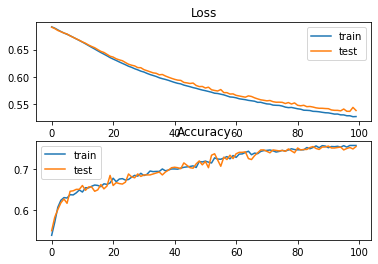

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 5)                 505       
_________________________________________________________________
dense_34 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 12        
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

# define and fit model on a training dataset
def fit_model(trainX, trainy, testX, testy):
	# define model
	model = Sequential()
	model.add(Dense(5, input_dim=100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(2, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
	return model, history

# summarize the performance of the fit model
def summarize_model(model, history, trainX, trainy, testX, testy):
	# evaluate the model
	_, train_acc = model.evaluate(trainX, trainy, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
	# plot loss during training
	pyplot.subplot(211)
	pyplot.title('Loss')
	pyplot.plot(history.history['loss'], label='train')
	pyplot.plot(history.history['val_loss'], label='test')
	pyplot.legend()
	# plot accuracy during training
	pyplot.subplot(212)
	pyplot.title('Accuracy')
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_accuracy'], label='test')
	pyplot.legend()
	pyplot.show()

# fit model on train dataset
model1, history = fit_model(trainX, trainy, testX, testy)
# evaluate model behavior
summarize_model(model1, history, trainX, trainy, testX, testy)
print(model1.summary())

In [73]:
#TRANSFER LEARNING
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.30, random_state=2)

Train: 0.644, Test: 0.648


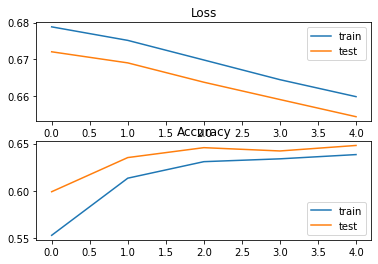

In [74]:
def fit_model2(trainX, trainy, testX, testy):
	# define model
	model = Sequential()
	model.add(Dense(5, input_dim=100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(2, activation='softmax'))
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=5, verbose=0)
	return model, history

model2, history2 = fit_model2(trainX, trainy, testX, testy)
summarize_model(model2, history2, trainX, trainy, testX, testy)

In [88]:
def fit_model_transfer(trainX, trainy, testX, testy):
	# define model
	model = model1
	# compile model
	model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
	return model, history

Train: 0.783, Test: 0.787


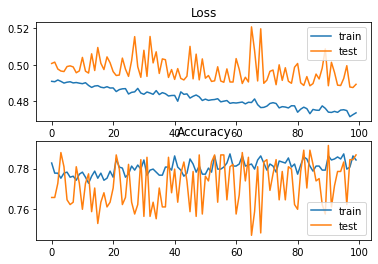

In [90]:
model3, history3 = fit_model_transfer(trainX, trainy, testX, testy)
summarize_model(model3, history3, trainX, trainy, testX, testy)

Transfer (fixed=0) 0.755 (0.006)
Transfer (fixed=1) 0.761 (0.002)
Transfer (fixed=2) 0.762 (0.000)


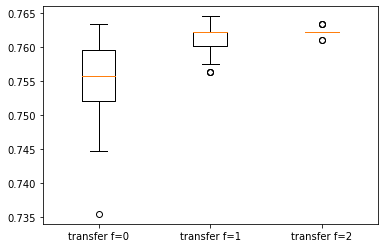

In [96]:
from statistics import mean
from statistics import stdev

# prepare data for problem 2
n_repeats = 30
dists, dist_labels = list(), list()

# repeated evaluation of transfer learning model, vary fixed layers
n_fixed = 3
for i in range(n_fixed):
	scores = eval_transfer_model(trainX, trainy, testX, testy, i, n_repeats)
	print('Transfer (fixed=%d) %.3f (%.3f)' % (i, mean(scores), stdev(scores)))
	dists.append(scores)
	dist_labels.append('transfer f='+str(i))

# box and whisker plot of score distributions
pyplot.boxplot(dists, labels=dist_labels)
pyplot.show()

# Semi supervised learning